* imputing missing values by random forest imputer 
* https://medium.com/analytics-vidhya/automatic-missingvalueshandler-library-with-a-random-forest-d8d380da1fe0
* library pip install missing value handler

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [2]:
df= pd.read_excel('glass.xlsx',sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.Type.value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [5]:
df.iloc[:,:-1].corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


In [6]:
rows ,cols = df.iloc[:,:-1].shape
flds = list(df.iloc[:,:-1].columns)
corr = df.iloc[:,:-1].corr().values
for i in range(cols):
    for j in range(i+1,cols):
        if corr[i,j] > 0.5 or  corr[i,j] <- 0.5:
            print (flds[i], ' ', flds[j], ' ', np.round(corr[i,j],decimals=2))

RI   Si   -0.54
RI   Ca   0.81


<Axes: >

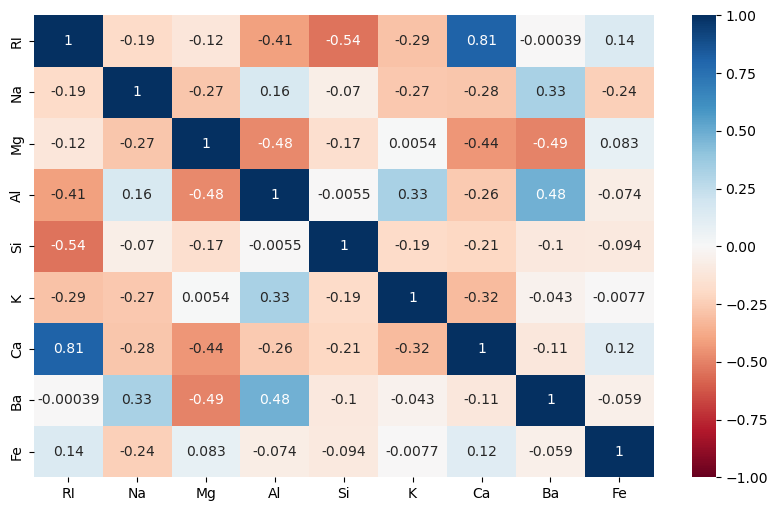

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.iloc[:,:-1].corr(),vmin=-1,vmax=1,cmap='RdBu',annot=True)

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>]], dtype=object)

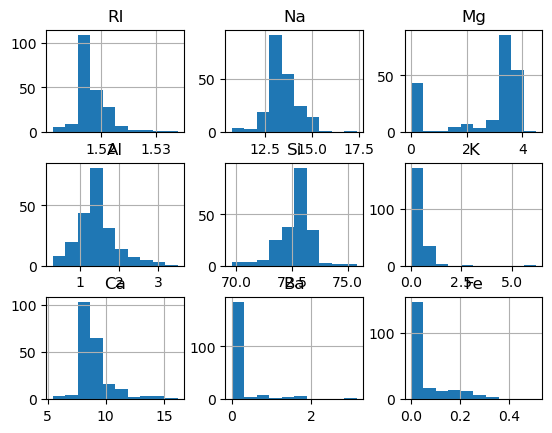

In [20]:
df.iloc[:,:-1].hist()

<Axes: >

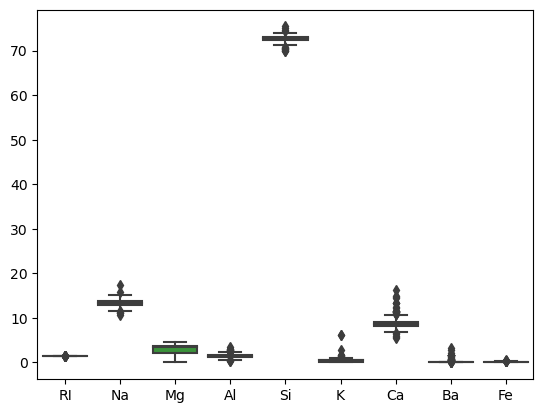

In [22]:
sns.boxplot(df.iloc[:,:-1])
# except Mg all features have outliers

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [75]:
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
model = RandomForestClassifier(n_estimators=100, max_features=3,max_depth=6, random_state=42)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7673160173160174


In [13]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1,random_state=42,stratify=y)

In [8]:
model=RandomForestClassifier(n_estimators=100,max_features=3,max_leaf_nodes=10,random_state=42)
model.fit(train_x,train_y)

RandomForestClassifier(max_features=3, max_leaf_nodes=10, random_state=42)

In [9]:
print(classification_report(model.predict(test_x),test_y))

              precision    recall  f1-score   support

           1       0.71      0.71      0.71         7
           2       0.88      0.70      0.78        10
           3       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.77        22
   macro avg       0.68      0.74      0.69        22
weighted avg       0.83      0.77      0.79        22



In [18]:
train_x.shape,train_y.shape

((192, 9), (192,))

In [27]:
cart=DecisionTreeClassifier()
model_bag = BaggingClassifier(base_estimator=cart, n_estimators=500,max_features=3,bootstrap=False,random_state=42)
model_bag.fit(train_x,train_y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  max_features=3, n_estimators=500, random_state=42)

In [28]:
print(classification_report(model_bag.predict(test_x),test_y))

              precision    recall  f1-score   support

           1       0.86      0.75      0.80         8
           2       0.62      0.83      0.71         6
           3       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       1.00      0.75      0.86         4

    accuracy                           0.77        22
   macro avg       0.83      0.81      0.78        22
weighted avg       0.82      0.77      0.78        22



In [16]:
model_boost = AdaBoostClassifier(n_estimators=1000,learning_rate=0.001, random_state=42)
model_boost.fit(train_x,train_y)

AdaBoostClassifier(learning_rate=0.001, n_estimators=1000, random_state=42)

In [17]:
print(classification_report(model_boost.predict(test_x),test_y))

              precision    recall  f1-score   support

           1       0.86      0.50      0.63        12
           2       0.50      0.50      0.50         8
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.67      1.00      0.80         2

    accuracy                           0.55        22
   macro avg       0.34      0.33      0.32        22
weighted avg       0.71      0.55      0.60        22



# Bagging and Boosting: Ensemble Learning Techniques
* Ensemble learning is a technique that combines multiple models to improve predictive performance. Bagging and Boosting are two common ensemble methods.

### Bagging (Bootstrap Aggregating)
* How it works:
* Bootstrap Sampling: Creates multiple subsets of the original dataset by randomly sampling with replacement.
* Model Training: Trains a model on each subset.
* Aggregation: Combines the predictions of all models, typically using a majority vote or averaging.
* Key Idea: Reduces variance by creating diverse models.
### Boosting
* How it works:
* Sequential Learning: Trains models sequentially, focusing on examples that were misclassified by previous models.
* Weight Adjustment: Assigns weights to examples based on their classification accuracy, giving more weight to misclassified examples.
* Key Idea: Reduces bias by iteratively improving the model's performance on difficult examples.
### Differences between Bagging and Boosting
* **Feature**------------------------**Bagging**----------------**Boosting**
* Model Creation-----------------------Parallel--------------------Sequential
* Weighting------------------------------Equal----------------------Unequal (focus on misclassified examples)
* Bias-Variance Trade-off-------------------Reduces variance-----------------Reduces bias
* Typical Algorithms	Random Forest, Bagged Trees	AdaBoost, Gradient Boosting, XGBoost



# Handling Imbalance in Data
* When dealing with imbalanced datasets (where one class has significantly more examples than the other), it's important to take steps to prevent the model from being biased towards the majority class. Here are some common techniques:

### Oversampling:
* Random Oversampling: Randomly duplicates examples from the minority class to balance the dataset.
* SMOTE (Synthetic Minority Over-sampling Technique): Creates synthetic examples for the minority class based on its nearest neighbors.
### Undersampling:
* Random Undersampling: Randomly removes examples from the majority class to balance the dataset.
* Tomek Links: Removes examples from the majority class that are very close to examples from the minority class.
### Class Weighting:
* Assigns higher weights to examples from the minority class during training to give them more influence on the model.
### Ensemble Methods:
* Some ensemble methods, like AdaBoost, can naturally handle imbalanced data by adjusting the weights of examples during training.
### Cost-Sensitive Learning:
* Adjusts the cost function to penalize misclassification of examples from the minority class more heavily.